### Importing Libraries

In [1]:
import pandas as pd #basic data operations 
import numpy as np
import re #for using regex functions
import seaborn as sns
import matplotlib.pyplot as plt # for visualization of data
from matplotlib import style   # to set style for the plots
style.use('ggplot') # ggplot is used here 
from sklearn.feature_extraction.text import CountVectorizer #to vectorize the text document
from sklearn.model_selection import train_test_split #to train the texting data
from sklearn.linear_model import LogisticRegression #to perform logistic regression on the data

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay  #different evaluation model for evaluation
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")

In [2]:
text_df = pd.read_csv('TSA-Preprocessing-dropped-60k.csv')  #to load the data
text_df = text_df.sample(n=20000,replace=False)
# text_df.to_csv("Dataset 20k.csv", index=False)

In [3]:
text_df.head() 

,text,polarity,sentiment
77332,second dose rescheduled fully vaccinated end j...,0.400,Positive
54693,sputnikv coming soon least covin app entry ho gai,-0.300,Negative
26025,husband traveled another county march 8 get fi...,0.075,Positive
17086,members presidential task force ptf covid19 mo...,0.000,Neutral
99329,175517 400101 31072021 15 dose1 terapanth bhav...,-0.300,Negative


In [4]:
text_df

,text,polarity,sentiment
77332,second dose rescheduled fully vaccinated end j...,0.400,Positive
54693,sputnikv coming soon least covin app entry ho gai,-0.300,Negative
26025,husband traveled another county march 8 get fi...,0.075,Positive
17086,members presidential task force ptf covid19 mo...,0.000,Neutral
99329,175517 400101 31072021 15 dose1 terapanth bhav...,-0.300,Negative
...,...,...,...
55434,india india india producing 2 billion200 crore...,0.000,Neutral
144403,covaxin constitutes close 11 vaccine doses adm...,0.100,Positive
21974,blue dog news russianembassy anticovid19 news ...,0.200,Positive
57539,megawebinfo veconica sputnikvaccine thats lie ...,0.000,Neutral


### Count-Vectorization 


In [5]:
vect = CountVectorizer().fit(text_df['text'])

### Creating the Unigram Model

In [6]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)
X

<20000x27615 sparse matrix of type '<class 'numpy.int64'>'
	with 214226 stored elements in Compressed Sparse Row format>

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (16000, 27615)
Size of y_train: (16000,)
Size of x_test: (4000, 27615)
Size of y_test: (4000,)


# Applying Models

# Logistic Regression

In [9]:
logreg = LogisticRegression()
logreg_model = logreg.fit(x_train, y_train)
logreg_pred = logreg_model.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 91.80%


In [10]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 405  121   55]
 [   6 1543   18]
 [  35   93 1724]]


              precision    recall  f1-score   support

    Negative       0.91      0.70      0.79       581
     Neutral       0.88      0.98      0.93      1567
    Positive       0.96      0.93      0.94      1852

    accuracy                           0.92      4000
   macro avg       0.92      0.87      0.89      4000
weighted avg       0.92      0.92      0.92      4000



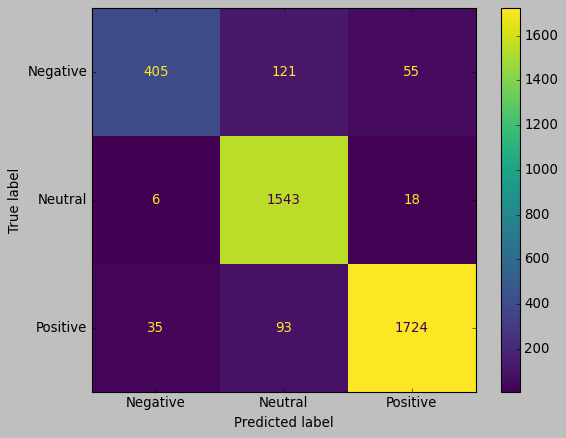

In [11]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

# Naive Bayes

In [12]:
nb = MultinomialNB(alpha=1.0,fit_prior=True,class_prior=None)

nb_model = nb.fit(x_train, y_train)

nb_pred = nb_model.predict(x_test)

print("Test Accuracy: ", round(accuracy_score(y_test, nb_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, nb_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, nb_pred))

Test Accuracy:  70.8 %


[[ 287   35  259]
 [ 119  816  632]
 [  70   53 1729]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.60      0.49      0.54       581
     Neutral       0.90      0.52      0.66      1567
    Positive       0.66      0.93      0.77      1852

    accuracy                           0.71      4000
   macro avg       0.72      0.65      0.66      4000
weighted avg       0.75      0.71      0.70      4000



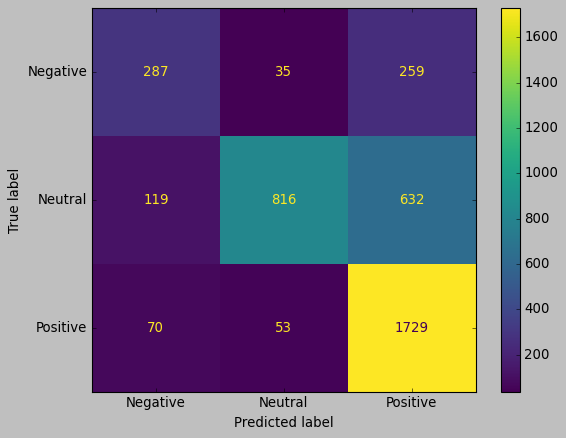

In [13]:
style.use('classic')
cm = confusion_matrix(y_test, nb_pred, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=nb.classes_)
disp.plot()

# SVM

In [14]:
# Train an SVM classifier on the training set
clf = LinearSVC()
sv_model = clf.fit(x_train, y_train)

# Evaluate the model's performance on the testing set
sv_pred = sv_model.predict(x_test)
print("Test Accuracy:", round(accuracy_score(y_test, sv_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, sv_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, sv_pred))

Test Accuracy: 94.38 %


[[ 467   70   44]
 [   3 1552   12]
 [  33   63 1756]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.93      0.80      0.86       581
     Neutral       0.92      0.99      0.95      1567
    Positive       0.97      0.95      0.96      1852

    accuracy                           0.94      4000
   macro avg       0.94      0.91      0.92      4000
weighted avg       0.94      0.94      0.94      4000



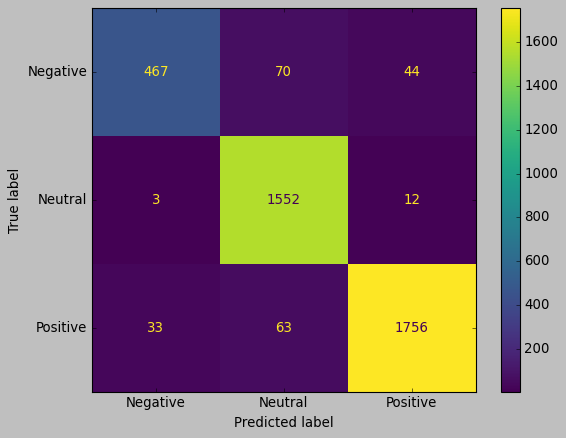

In [15]:
style.use('classic')
cm = confusion_matrix(y_test, sv_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
disp.plot()

# KNN

In [16]:
kn = KNeighborsClassifier(n_neighbors=3)

kn_model = kn.fit(x_train, y_train)

kn_pred = kn_model.predict(x_test)

print("Test Accuracy: ", round(accuracy_score(y_test, kn_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, kn_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, kn_pred,))

Test Accuracy:  59.42 %


[[ 100  445   36]
 [  27 1469   71]
 [  48  996  808]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.57      0.17      0.26       581
     Neutral       0.50      0.94      0.66      1567
    Positive       0.88      0.44      0.58      1852

    accuracy                           0.59      4000
   macro avg       0.65      0.52      0.50      4000
weighted avg       0.69      0.59      0.57      4000



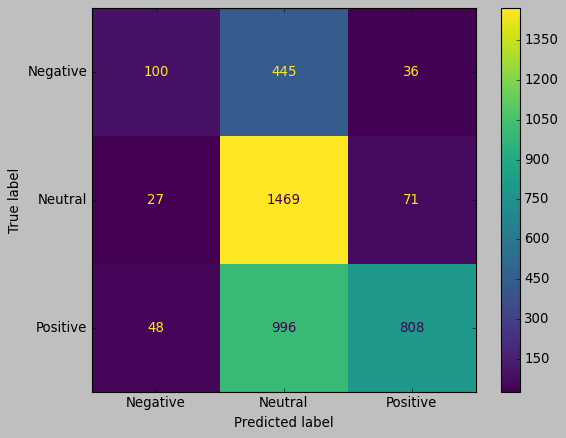

In [17]:
style.use('classic')
cm = confusion_matrix(y_test, kn_pred, labels=kn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=kn.classes_)
disp.plot()

# Decision Tree

In [18]:
dtc = DecisionTreeClassifier(criterion= 'entropy',max_depth = 1000, splitter='best', random_state=100)
dtc_model = dtc.fit(x_train, y_train)

dtc_pred = dtc_model.predict(x_test)

print("Test Accuracy: ", round(accuracy_score(y_test, dtc_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, dtc_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, dtc_pred))

Test Accuracy:  91.75 %


[[ 438   76   67]
 [  15 1530   22]
 [  56   94 1702]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.86      0.75      0.80       581
     Neutral       0.90      0.98      0.94      1567
    Positive       0.95      0.92      0.93      1852

    accuracy                           0.92      4000
   macro avg       0.90      0.88      0.89      4000
weighted avg       0.92      0.92      0.92      4000



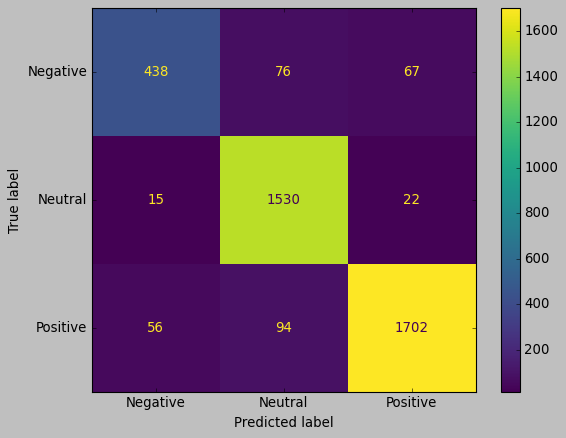

In [19]:
style.use('classic')
cm = confusion_matrix(y_test, dtc_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=dtc.classes_)
disp.plot()

# Random Forest

In [20]:
rf = RandomForestClassifier(max_depth = 2000, random_state=42,n_estimators=100,criterion="entropy")

# Train the model on the training set
rf_model = rf.fit(x_train, y_train)

In [21]:
# Make predictions on the test set
rf_pred = rf.predict(x_test)

print("Test accuracy:", round(accuracy_score(y_test, rf_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, rf_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, rf_pred))

Test accuracy: 90.42 %


[[ 384  131   66]
 [   1 1550   16]
 [  28  141 1683]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.93      0.66      0.77       581
     Neutral       0.85      0.99      0.91      1567
    Positive       0.95      0.91      0.93      1852

    accuracy                           0.90      4000
   macro avg       0.91      0.85      0.87      4000
weighted avg       0.91      0.90      0.90      4000



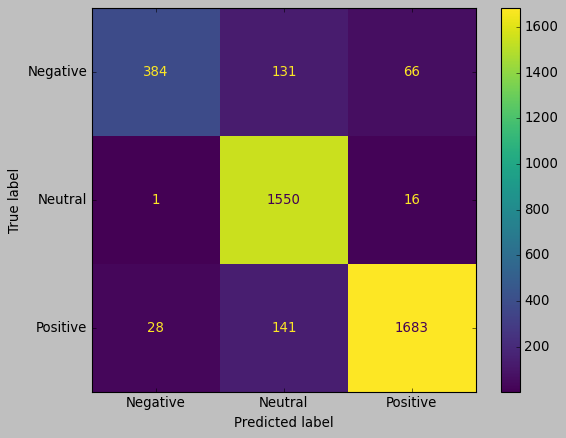

In [22]:
style.use('classic')
cm = confusion_matrix(y_test, rf_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf.classes_)
disp.plot()

#  Store the model names and their accuracy in a dataframe

In [23]:
res = []
res = pd.DataFrame(res)
res["models"] = ["Logistic Regression", "Naive Bayes","SVM",  "KNN", "Decision Tree", "Random Forest"]
res["accuracy"] = [ round(accuracy_score(y_test, logreg_pred)*100,2),round(accuracy_score(y_test, nb_pred)*100,2),round(accuracy_score(y_test, sv_pred)*100,2), round(accuracy_score(y_test, kn_pred)*100,2), round(accuracy_score(y_test, dtc_pred)*100,2), round(accuracy_score(y_test, rf_pred)*100,2)]
res = res.sort_values("accuracy", ascending=False).reset_index(drop=True)
res.to_csv('model_results_20k.csv', index=False)
res

,models,accuracy
0,SVM,94.38
1,Logistic Regression,91.80
2,Decision Tree,91.75
3,Random Forest,90.42
4,Naive Bayes,70.80
5,KNN,59.42


#  Save the traied models locally

In [24]:
import joblib

joblib.dump(logreg_model, 'Trained Models_20k/logregr_model.pkl')
joblib.dump(nb_model, 'Trained Models_20k/nb_model.pkl')
joblib.dump(sv_model, 'Trained Models_20k/svm_model.pkl')
joblib.dump(kn_model, 'Trained Models_20k/kn_model.pkl')
joblib.dump(dtc_model, 'Trained Models_20k/dtc_model.pkl')
joblib.dump(rf_model, 'Trained Models_20k/rf_model.pkl')

['Trained Models_20k/rf_model.pkl']